Method A: n=12, mean=86.75, std=3.89
Method B: n=10, mean=80.60, std=2.37

t-statistic: 4.5593
p-value: 0.0002
Degrees of freedom: 18.49
Critical value: ±2.0969

Decision Process:
If |t| > t_crit, reject H₀
|4.5593| > 2.0969?
Reject H₀

Alternative decision using p-value:
If p < α, reject H₀
0.0002 < 0.05?
Reject H₀


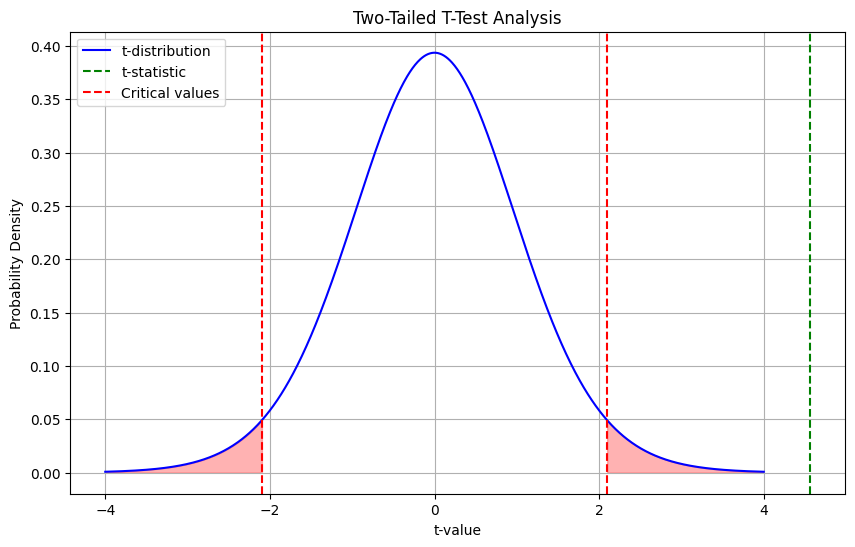


Effect size (Cohen's d): 1.8686
95% Confidence Interval: (3.32, 8.98)


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Sample Problem: 
# Testing if a new teaching method affects student scores
# H₀: μ₁ = μ₂ (no difference between methods)
# H₁: μ₁ ≠ μ₂ (there is a difference)
# α = 0.05

# Generate sample data
np.random.seed(42)  # for reproducibility
method_A = np.array([85, 88, 92, 78, 89, 86, 91, 83, 87, 88, 90, 84])  # n₁ = 12
method_B = np.array([79, 82, 81, 77, 85, 80, 78, 83, 81, 80])          # n₂ = 10

# 1. Calculate basic statistics
n1, n2 = len(method_A), len(method_B)
mean1, mean2 = np.mean(method_A), np.mean(method_B)
std1, std2 = np.std(method_A, ddof=1), np.std(method_B, ddof=1)  # ddof=1 for sample std

print(f"Method A: n={n1}, mean={mean1:.2f}, std={std1:.2f}")
print(f"Method B: n={n2}, mean={mean2:.2f}, std={std2:.2f}")

# 2. Perform t-test
t_stat, p_value = stats.ttest_ind(method_A, method_B, equal_var=False)  # Welch's t-test
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 3. Calculate degrees of freedom (Welch's formula)
df = (std1**2/n1 + std2**2/n2)**2 / ((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))
print(f"Degrees of freedom: {df:.2f}")

# 4. Find critical value
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)  # two-tailed
print(f"Critical value: ±{t_crit:.4f}")

# 5. Make decision
print("\nDecision Process:")
print(f"If |t| > t_crit, reject H₀")
print(f"|{t_stat:.4f}| > {t_crit:.4f}?")

if abs(t_stat) > t_crit:
    print("Reject H₀")
else:
    print("Fail to reject H₀")

print(f"\nAlternative decision using p-value:")
print(f"If p < α, reject H₀")
print(f"{p_value:.4f} < {alpha}?")

if p_value < alpha:
    print("Reject H₀")
else:
    print("Fail to reject H₀")

# 6. Visualize
plt.figure(figsize=(10, 6))
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.t.pdf(x, df), 'b-', label='t-distribution')

# Add critical regions
x_fill_left = np.linspace(-4, -t_crit, 100)
x_fill_right = np.linspace(t_crit, 4, 100)
plt.fill_between(x_fill_left, stats.t.pdf(x_fill_left, df), color='red', alpha=0.3)
plt.fill_between(x_fill_right, stats.t.pdf(x_fill_right, df), color='red', alpha=0.3)

# Add vertical lines for t-statistic and critical values
plt.axvline(x=t_stat, color='g', linestyle='--', label='t-statistic')
plt.axvline(x=-t_crit, color='r', linestyle='--', label='Critical values')
plt.axvline(x=t_crit, color='r', linestyle='--')

plt.title('Two-Tailed T-Test Analysis')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# 7. Calculate effect size (Cohen's d)
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
cohens_d = (mean1 - mean2) / pooled_std
print(f"\nEffect size (Cohen's d): {cohens_d:.4f}")

# 8. Calculate confidence interval
se = np.sqrt(std1**2/n1 + std2**2/n2)
ci_lower = (mean1 - mean2) - t_crit * se
ci_upper = (mean1 - mean2) + t_crit * se
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

In [2]:
import numpy as np
from scipy import stats

# Given data
n1, n2 = 14, 15
mean1, mean2 = 6.4, 7.3
sd1, sd2 = 1.4, 1.5
alpha = 0.01

# 1. Calculate t-statistic
# Formula: t = (x̄₁ - x̄₂) / √(s₁²/n₁ + s₂²/n₂)
se = np.sqrt((sd1**2/n1) + (sd2**2/n2))
t_stat = (mean1 - mean2) / se

# 2. Calculate degrees of freedom (Welch's formula)
df = (sd1**2/n1 + sd2**2/n2)**2 / ((sd1**2/n1)**2/(n1-1) + (sd2**2/n2)**2/(n2-1))

# 3. Find critical value
t_crit = stats.t.ppf(1 - alpha/2, df)

# 4. Calculate p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))  # multiply by 2 for two-tailed

print(f"Test Statistics:")
print(f"t-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df:.4f}")
print(f"Critical value: ±{t_crit:.4f}")
print(f"p-value: {p_value:.4f}")

print("\nDecision Rules:")
print(f"Reject H₀ if |t| > {t_crit:.4f}")
print(f"Reject H₀ if p < {alpha}")

if abs(t_stat) > t_crit:
    print("\nDecision: Reject H₀")
else:
    print("\nDecision: Fail to reject H₀")

# Calculate confidence interval (99% since α = 0.01)
ci_lower = (mean1 - mean2) - t_crit * se
ci_upper = (mean1 - mean2) + t_crit * se
print(f"\n99% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")

Test Statistics:
t-statistic: -1.6713
Degrees of freedom: 26.9998
Critical value: ±2.7707
p-value: 0.1062

Decision Rules:
Reject H₀ if |t| > 2.7707
Reject H₀ if p < 0.01

Decision: Fail to reject H₀

99% Confidence Interval: (-2.3921, 0.5921)


In [ ]:
# Think of it like this:

# t_critical creates boundaries (±2.771)
# To reject H₀, we need evidence that's MORE extreme than these boundaries
# Our evidence (-1.67) isn't extreme enough
# Therefore, we fail to reject H₀

# This means we don't have enough evidence to conclude there's a significant difference between the two medicines at α = 0.01.

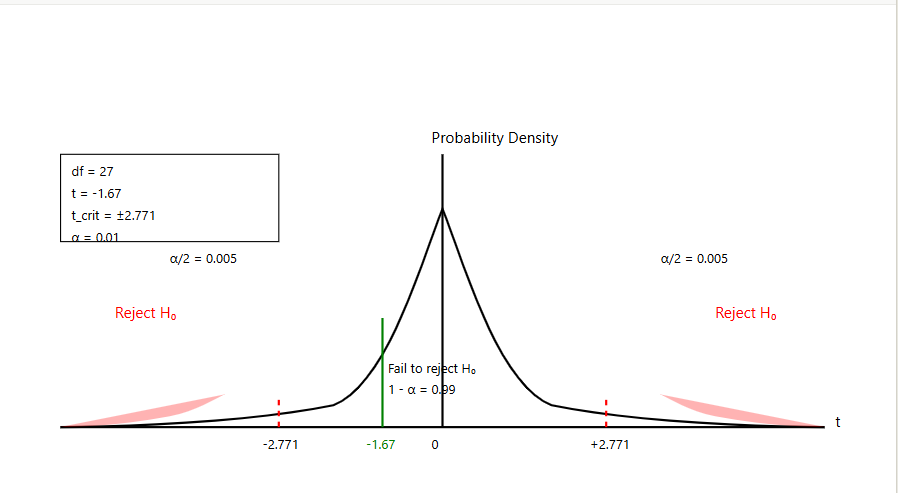


Paired T-Test Analysis
--------------------------------------------------
Sample size (n): 9
Mean difference: 0.22
Standard deviation of differences: 6.61
Standard error: 2.20
Degrees of freedom: 8
t-statistic: 0.1009
t-critical (α = 0.05): ±2.3060
p-value: 0.9221

Decision:
Fail to reject H₀

95% Confidence Interval: (-4.86, 5.30)


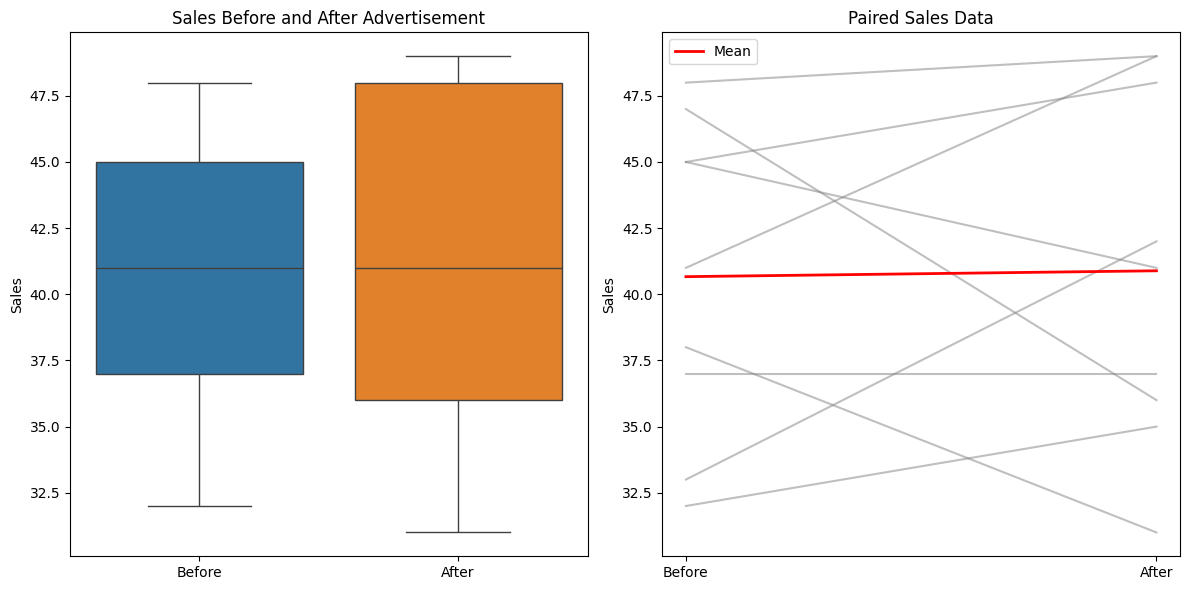


Summary Statistics:
          Before      After  Difference
count   9.000000   9.000000    9.000000
mean   40.666667  40.888889    0.222222
std     5.979130   6.660414    6.610177
min    32.000000  31.000000  -11.000000
25%    37.000000  36.000000   -4.000000
50%    41.000000  41.000000    1.000000
75%    45.000000  48.000000    3.000000
max    48.000000  49.000000    9.000000

Individual Differences (After - Before):
   Difference
0           9
1           3
2          -7
3          -4
4           0
5         -11
6           1
7           8
8           3


In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Given data
before = [33, 32, 38, 45, 37, 47, 48, 41, 45]
after = [42, 35, 31, 41, 37, 36, 49, 49, 48]

# Create DataFrame
data = pd.DataFrame({
    'Before': before,
    'After': after
})

# Calculate differences
data['Difference'] = data['After'] - data['Before']

# Basic statistics
n = len(before)
mean_diff = data['Difference'].mean()
std_diff = data['Difference'].std(ddof=1)
se_diff = std_diff / np.sqrt(n)

# Calculate t-statistic
t_stat = mean_diff / se_diff

# Degrees of freedom
df = n - 1

# Calculate p-value (two-tailed)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Calculate critical value (α = 0.05)
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)

# Print results
print("Paired T-Test Analysis")
print("-" * 50)
print(f"Sample size (n): {n}")
print(f"Mean difference: {mean_diff:.2f}")
print(f"Standard deviation of differences: {std_diff:.2f}")
print(f"Standard error: {se_diff:.2f}")
print(f"Degrees of freedom: {df}")
print(f"t-statistic: {t_stat:.4f}")
print(f"t-critical (α = 0.05): ±{t_crit:.4f}")
print(f"p-value: {p_value:.4f}")

# Decision
print("\nDecision:")
if abs(t_stat) > t_crit:
    print("Reject H₀")
else:
    print("Fail to reject H₀")

# Calculate confidence interval
ci_lower = mean_diff - t_crit * se_diff
ci_upper = mean_diff + t_crit * se_diff
print(f"\n95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Visualization
plt.figure(figsize=(12, 6))

# Create subplot 1: Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=data[['Before', 'After']])
plt.title('Sales Before and After Advertisement')
plt.ylabel('Sales')

# Create subplot 2: Paired plot
plt.subplot(1, 2, 2)
for i in range(len(before)):
    plt.plot([1, 2], [before[i], after[i]], 'gray', alpha=0.5)
plt.plot([1, 2], [np.mean(before), np.mean(after)], 'r', linewidth=2, label='Mean')
plt.xticks([1, 2], ['Before', 'After'])
plt.title('Paired Sales Data')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Print individual differences
print("\nIndividual Differences (After - Before):")
print(data['Difference'].to_frame())